In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.special as ss

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [7]:
%cd /content/gdrive/MyDrive/Sem_5/FODS_Project

/content/gdrive/MyDrive/Sem_5/FODS_Project


# 1A

In [8]:
def beta(a, b, x):
    gammaConst = np.exp(ss.gammaln(a+b) - (ss.gammaln(a) + ss.gammaln(b)))
    # return (ss.gamma(a+b)/(ss.gamma(a)*ss.gamma(b))) * (x**(a-1)) * ((1-x)**(b-1))
    return gammaConst * (x**(a-1)) * ((1-x)**(b-1))

In [83]:
#Prior Distribution
def ques1A():
  x = np.arange(1000)/1000
  plt.figure(figsize=(10, 10))

  plt.subplot(4,1,1)
  a = 2
  b = 2
  grph = beta(a,b,x)
  plt.title("Prior Distribution")
  plt.plot(x,grph)

  plt.subplot(4,1,2)
  a = 2+40
  b = 2+10
  grph = beta(a,b,x)
  plt.title("Posterior Distribution 1")
  plt.plot(x,grph)

  plt.subplot(4,1,3)
  a = 2+40+13
  b = 2+10+17
  grph = beta(a,b,x)
  plt.title("Posterior Distribution 2")
  plt.plot(x,grph)

  plt.subplot(4,1,4)
  a = 2+40+13+70
  b = 2+10+17+30
  grph = beta(a,b,x)
  plt.title("Posterior Distribution 3")
  print(x[np.argmax(grph)])
  plt.plot(x,grph)

  plt.tight_layout()

0.681


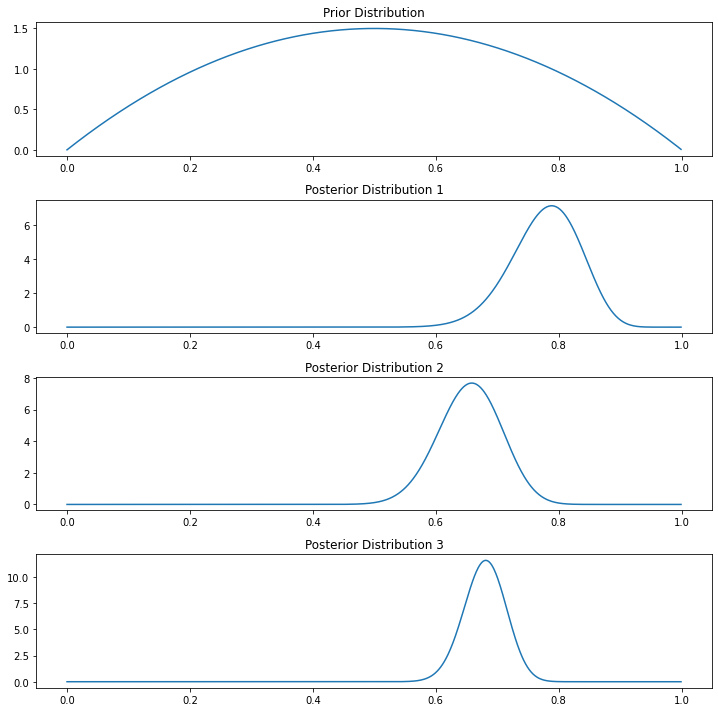

In [84]:
ques1A()

# 1B

In [58]:
def load_dataset(test_split = 0.8):
  a = pd.read_csv('/content/gdrive/MyDrive/Sem_5/FODS_Project/fods_1.csv')
  features = np.array(a.iloc[:, 0:2])
  targets = np.array(a.iloc[:, 2]).reshape(features.shape[0], 1)
  np.random.seed(0)
  np.random.shuffle(features)
  np.random.seed(0)
  np.random.shuffle(targets)
  m = features.shape[0]
  
  features_train = features[:int(m*test_split),:]
  targets_train = targets[:int(m*test_split),:]
  
  features_test = features[int(m*test_split):,:]
  targets_test = targets[int(m*test_split):,:]

  return features_train, targets_train, features_test, targets_test

In [12]:
def loss(y, y_pred):
  return 0.5*np.mean((y_pred-y)**2)

def grads(X, y, y_pred):
  m = X.shape[0]
  dy = (y_pred - y)
  dW = (1/m) * np.dot(X.T, dy)
  return dW

def change_dim(X, degree):
  tmp = np.array(X.copy())
  m = X.shape[0]
  dim = int(0.5*(degree+2)*(degree+1))
  out = np.zeros((m,dim))
  
  index = 0
  for i in range(degree+1):
    j = 0
    while i+j <= degree:
      out[:, index] = (tmp[:, 0]**i) * (tmp[:, 1]**j)
      j+=1
      index+=1
  
  #out = out / out.max(axis=0)
  out[:, 1:] = (out[:, 1:] - np.mean(out[:, 1:], axis=0)) / np.std(out[:, 1:], axis=0)

  return out

def train(X, y, degree, bs, epochs = 100, learning_rate = 10e-3):
  x = change_dim(X, degree)
  m,n = x.shape
  W = np.zeros((n, 1))
  #np.random.seed(0)
  #W = np.random.rand(n,1)
  cost_hist = []

  for epoch in range(epochs):
    for i in range((m-1)//bs+1):
      start_i = i*bs
      end_i = start_i + bs
      xb = x[start_i:end_i]
      yb = y[start_i:end_i]

      y_pred = np.dot(xb, W)
      
      dW = grads(xb, yb, y_pred)

      W -= learning_rate*dW
    
    J = loss(y, np.dot(x, W))
    cost_hist.append(J)
  
  return W, cost_hist

def predict(X, W, degree):
  tmp = change_dim(X,degree)
  return np.dot(tmp, W)

In [54]:
X_train, Y_train, X_test, Y_test = load_dataset()

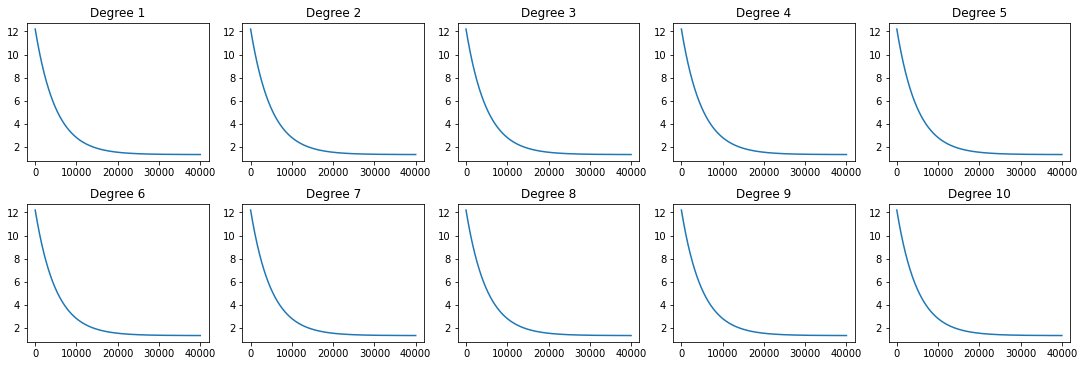

In [132]:
test_costs = []
train_costs = []
fig = plt.figure(figsize=(15,5))
for i in range(10):
  W, J = train(X_train, Y_train, bs = 500, degree=i+1, epochs = 40000, learning_rate = 10e-5)
  train_costs.append(J[-1])
  test_costs.append(loss(Y_test, predict(X_test, W, i+1)))
  plt.subplot(2,5, i+1)
  plt.plot(J)
  plt.title("Degree {}".format(i+1))

fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

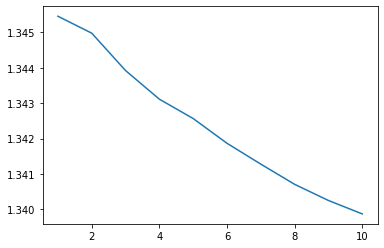

In [133]:
plt.plot(np.arange(1,11), train_costs)

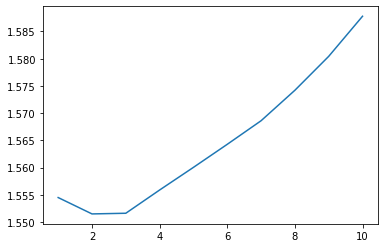

In [134]:
plt.plot(np.arange(1,11), test_costs)

In [135]:
results_table = np.zeros((10,3))
for i in range(10):
  results_table[i][0] = i+1
  results_table[i][1] = train_costs[i]
  results_table[i][2] = test_costs[i]
  
print(results_table)

[[ 1.          1.3454587   1.5544906 ]
 [ 2.          1.34498056  1.55148404]
 [ 3.          1.34392362  1.55160594]
 [ 4.          1.34311396  1.55587694]
 [ 5.          1.3425665   1.56003595]
 [ 6.          1.34186746  1.56427138]
 [ 7.          1.34127743  1.56860186]
 [ 8.          1.34070649  1.57420134]
 [ 9.          1.34024991  1.58043302]
 [10.          1.33987043  1.58779804]]


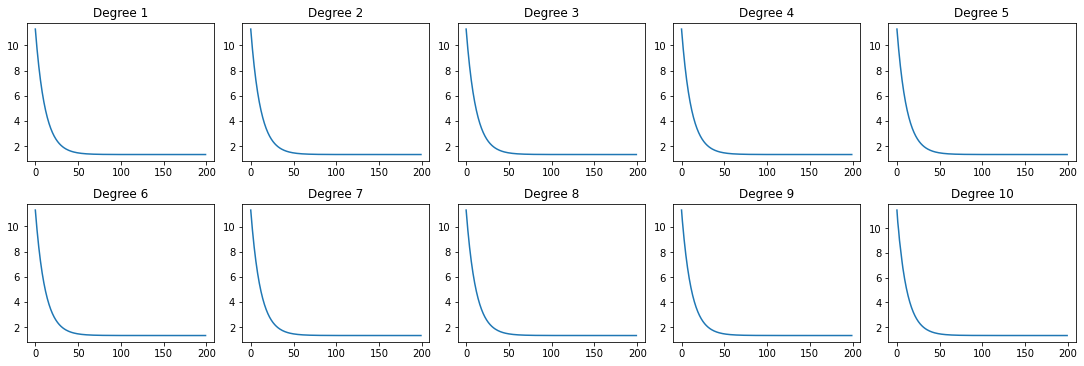

In [136]:
test_costs = []
train_costs = []
fig = plt.figure(figsize=(15,5))
for i in range(10):
  W, J = train(X_train, Y_train, bs = 1, degree=i+1, epochs = 200, learning_rate = 10e-5)
  train_costs.append(J[-1])
  test_costs.append(loss(Y_test, predict(X_test, W, i+1)))
  plt.subplot(2,5, i+1)
  plt.plot(J)
  plt.title("Degree {}".format(i+1))

fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

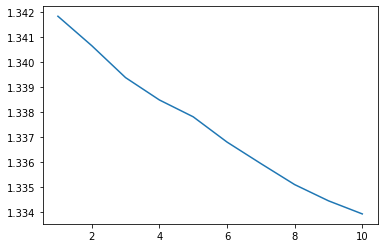

In [137]:
plt.plot(np.arange(1,11), train_costs)

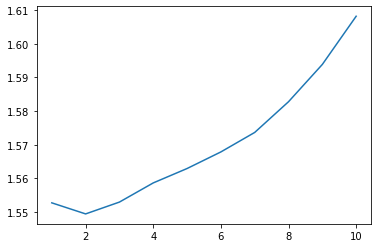

In [138]:
plt.plot(np.arange(1,11), test_costs)

In [139]:
results_table = np.zeros((10,3))
for i in range(10):
  results_table[i][0] = i+1
  results_table[i][1] = train_costs[i]
  results_table[i][2] = test_costs[i]
  
print(results_table)

[[ 1.          1.34181892  1.55266317]
 [ 2.          1.34064605  1.5493665 ]
 [ 3.          1.33937258  1.55289108]
 [ 4.          1.33848216  1.55859585]
 [ 5.          1.33781033  1.56287786]
 [ 6.          1.33680346  1.56782025]
 [ 7.          1.33594635  1.57361976]
 [ 8.          1.33510799  1.58276294]
 [ 9.          1.33446126  1.59386312]
 [10.          1.33393898  1.60820828]]


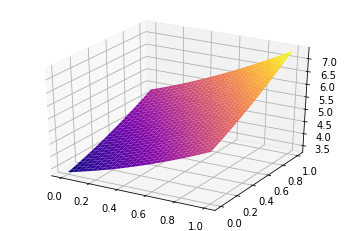

In [162]:
d = 2
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
W, J = train(X_train, Y_train, bs = 500, degree=d, epochs = 200, learning_rate = 10e-3)
x = np.linspace(0, 1, 30)
y = np.linspace(0, 1, 30)

vals = []

for i in x:
  for j in y:
    vals.append([i,j])

vals = np.array(vals)

X1, X2 = np.meshgrid(x, y, sparse =True)

x1 = change_dim(vals, d)
Y = np.dot(x1, W)
Y = Y.reshape(30,30)
ax.plot_surface(X1, X2, Y, rstride=1, cstride=1, cmap='plasma', edgecolor='none')


In [157]:
def loss_reg(y, y_pred, W, reg_const, q):
  return 0.5*np.mean((y_pred-y)**2) + 0.5*reg_const * np.sum(np.abs(W)**q)

def grads_reg(X, y, y_pred, W, reg_const, q):
  m = X.shape[0]
  if q!=1:
    dy = (y_pred - y) + 0.5*reg_const*np.sum(np.sign(W))
  else:
    dy = (y_pred - y) + 0.5*(q-1)*reg_const * np.sum(np.abs(W)**(q-1))
  dW = (1/m) * np.dot(X.T, dy)
  return dW

def change_dim(X, degree):
  tmp = np.array(X.copy())
  m = X.shape[0]
  dim = int(0.5*(degree+2)*(degree+1))
  out = np.zeros((m,dim))
  
  index = 0
  for i in range(degree+1):
    j = 0
    while i+j <= degree:
      out[:, index] = (tmp[:, 0]**i) * (tmp[:, 1]**j)
      j+=1
      index+=1
  
  out = out / out.max(axis=0)
  return out

def train_reg(X, y, q, bs, epochs = 100, reg_const = 10e-2, learning_rate = 10e-3):
  x = change_dim(X, 1)
  m,n = x.shape
  W = np.random.rand(n, 1)
  cost_hist = []

  for epoch in range(epochs):
    for i in range((m-1)//bs+1):
      start_i = i*bs
      end_i = start_i + bs
      xb = x[start_i:end_i]
      yb = y[start_i:end_i]

      y_pred = np.dot(xb, W)
      
      dW = grads_reg(xb, yb, y_pred, W, reg_const, q)

      W -= learning_rate*dW
    
    J = loss_reg(y, np.dot(x, W), W, reg_const, q)
    cost_hist.append(J)
  
  return W, cost_hist

def predict_reg(X, W):
  tmp = change_dim(X,1)
  return np.dot(tmp, W)

[1.2186842848109658, 1.3759122100166745, 2.1092266877454073, 9.773890299058417]
[1.0720474449864066, 1.0863186452298657, 1.1553650060862704, 1.9690794596527468]
[1.0578677317439211, 1.0540686166401634, 1.0560813901377888, 1.185544578559083]
[1.055141825433133, 1.0658565233930155, 1.0461768824403281, 1.0639739764709848]
[1.0575866593424497, 1.0660587042006666, 1.079603204263787, 1.0567722781062698]
[1.0770165114207135, 1.0588179143994496, 1.063462827506328, 1.060332919920145]
[1.061454577136751, 1.0626402644554485, 1.0536257943310021, 1.0665763015578962]


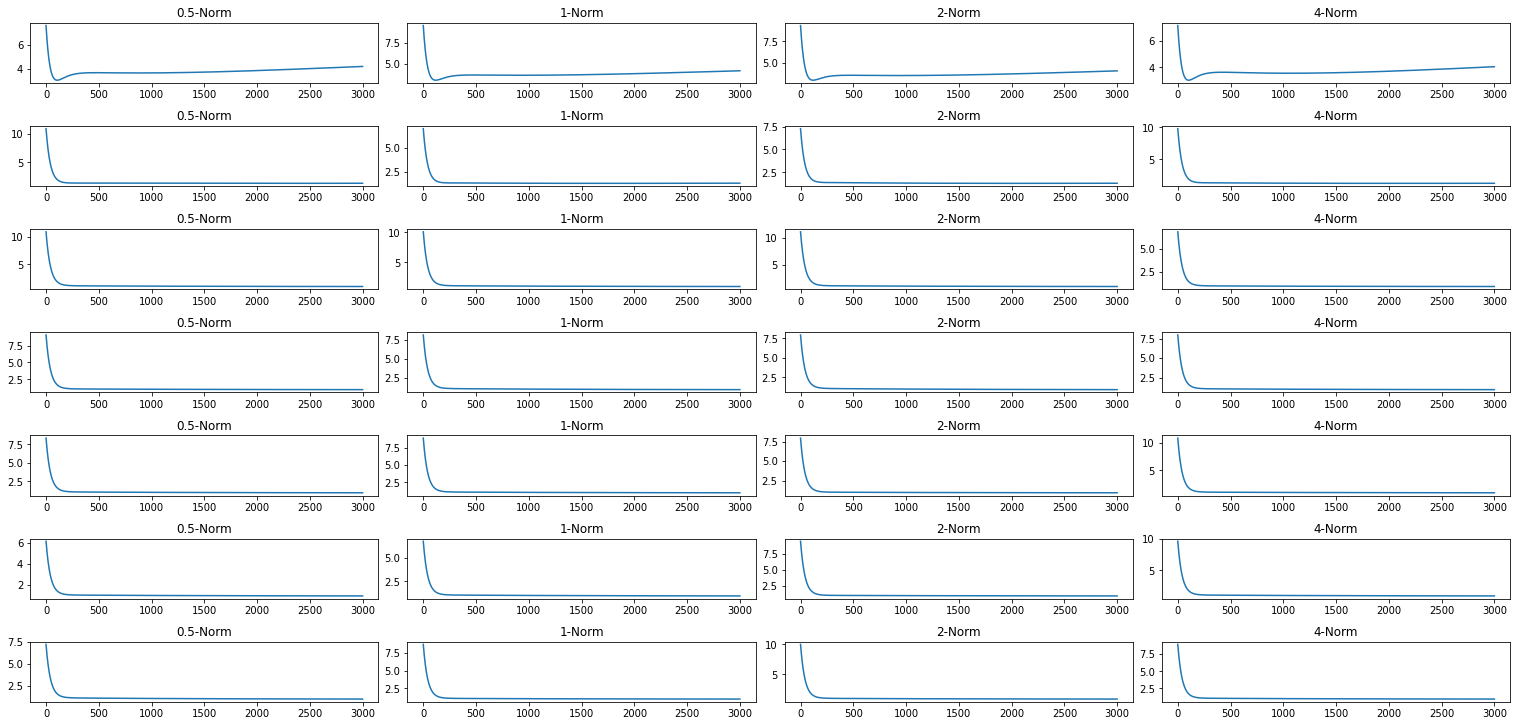

In [183]:
X_train, Y_train, X_test, Y_test = load_dataset()
test_costs = []
q_lst = [0.5, 1, 2, 4]
reg_const_lst = [10e-2, 10e-3, 10e-4, 10e-5, 10e-6, 10e-7, 10e-8]
fig = plt.figure(figsize=(3*len(reg_const_lst),10))
i = 0
for reg_const in reg_const_lst:
  for q in q_lst:
    W, J = train_reg(X_train, Y_train, bs = 500, q=3, epochs = 3000, reg_const=reg_const, learning_rate = 10e-3)
    test_costs.append(loss_reg(Y_test, predict_reg(X_test, W), W, reg_const, q))
    #plt.plot(J)
    plt.subplot(len(reg_const_lst),4, i+1)
    plt.plot(J)
    plt.title("{}-Norm".format(q))
    i+=1
  print(test_costs)
  test_costs = []

fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

# 1C

In [184]:
X_train, Y_train, X_test, Y_test = load_dataset()

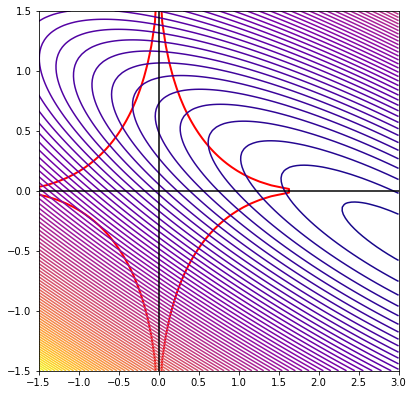

In [205]:
nums = 100
w1_xx, w2_yy = np.meshgrid(np.linspace(-1.5, 3, num=nums), np.linspace(-1.5, 1.5, num=nums))
E_zz = np.zeros((nums,nums))
for idx1 in range(nums):
  for idx2 in range(nums):
    E_zz[idx1][idx2] = (1/len(Y_train))*np.sum((Y_train - w1_xx[0][idx1]*X_train[:,0] - w2_yy[idx2][0]*X_train[:,1])**2)

xx, yy = np.meshgrid(np.linspace(-1.5, 3, num=nums), np.linspace(-1.5, 1.5, num=nums))
zz = ((np.abs((xx))**0.5) + (np.abs((yy))**0.5))/1.4
ax = plt.figure(figsize=(5,5)).add_axes([0,0,1,1])
ax.contour(xx, yy, zz, [1], colors='red', linewidths=2)
ax.contour(w1_xx, w2_yy, E_zz, nums, cmap='plasma')
ax.axhline(y=0, color = 'k')
ax.axvline(x=0, color = 'k')

2108.4970313979998


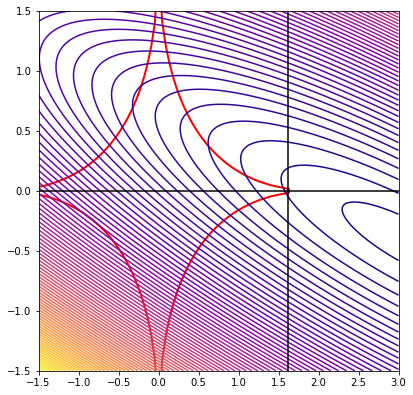

In [207]:
xx, yy = np.meshgrid(np.linspace(-1.5, 3, num=nums), np.linspace(-1.5, 1.5, num=nums))
zz = ((np.abs((xx))**0.5) + (np.abs((yy))**0.5))/1.4
ax = plt.figure(figsize=(5,5)).add_axes([0,0,1,1])
ax.contour(xx, yy, zz, [1], colors='red', linewidths=2)
ax.contour(w1_xx, w2_yy, E_zz, nums, cmap='plasma')
ax.axhline(y=0, color = 'k')
ax.axvline(x=1.62, color = 'k')

min_error = (1/len(Y_train))*np.sum((Y_train - 0*X_train[:,0] - 1.62*X_train[:,1])**2)
print(min_error)

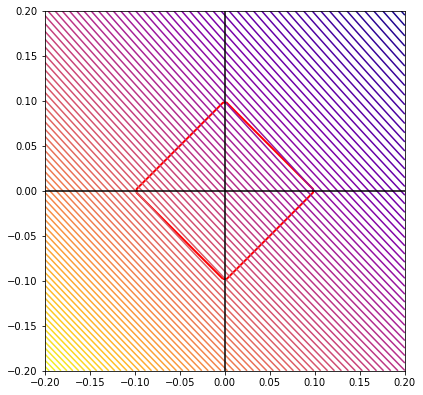

In [208]:
nums = 100
w1_xx, w2_yy = np.meshgrid(np.linspace(-0.2, 0.2, num=nums), np.linspace(-0.2, 0.2, num=nums))
E_zz = np.zeros((nums,nums))
for idx1 in range(nums):
  for idx2 in range(nums):
    E_zz[idx1][idx2] = (1/len(Y_train))*np.sum((Y_train - w1_xx[0][idx1]*X_train[:,0] - w2_yy[idx2][0]*X_train[:,1])**2)
    
xx, yy = np.meshgrid(np.linspace(-0.2, 0.2, num=100), np.linspace(-0.2, 0.2, num=100))
zz = ((np.abs((xx))**1) + (np.abs((yy))**1))/0.1
ax = plt.figure(figsize=(5,5)).add_axes([0,0,1,1])
ax.contour(xx, yy, zz, [1], colors='red', linewidths=2)
ax.contour(w1_xx, w2_yy, E_zz, nums, cmap='plasma')
ax.axhline(y=0, color = 'k')
ax.axvline(x=0, color = 'k')

9595.854782949998


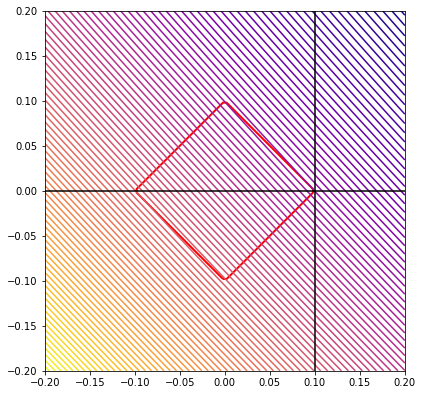

In [209]:
xx, yy = np.meshgrid(np.linspace(-0.2, 0.2, num=100), np.linspace(-0.2, 0.2, num=100))
zz = ((np.abs((xx))**1) + (np.abs((yy))**1))/0.1
ax = plt.figure(figsize=(5,5)).add_axes([0,0,1,1])
ax.contour(xx, yy, zz, [1], colors='red', linewidths=2)
ax.contour(w1_xx, w2_yy, E_zz, nums, cmap='plasma')
ax.axhline(y=0, color = 'k')
ax.axvline(x=0.1, color = 'k')

min_error = (1/len(Y_train))*np.sum((Y_train - 0*X_train[:,0] - 0.1*X_train[:,1])**2)
print(min_error)

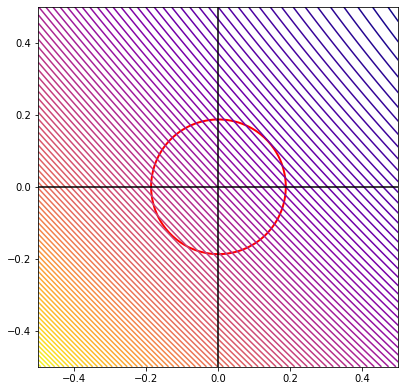

In [211]:
nums = 100
w1_xx, w2_yy = np.meshgrid(np.linspace(-0.5, 0.5, num=nums), np.linspace(-0.5, 0.5, num=nums))
E_zz = np.zeros((nums,nums))
for idx1 in range(nums):
  for idx2 in range(nums):
    E_zz[idx1][idx2] = (1/len(Y_train))*np.sum((Y_train - w1_xx[0][idx1]*X_train[:,0] - w2_yy[idx2][0]*X_train[:,1])**2)
    
xx, yy = np.meshgrid(np.linspace(-0.5, 0.5, num=100), np.linspace(-0.5, 0.5, num=100))
zz = ((np.abs((xx))**2) + (np.abs((yy))**2))/0.035
ax = plt.figure(figsize=(5,5)).add_axes([0,0,1,1])
ax.contour(xx, yy, zz, [1], colors='red', linewidths=2)
ax.contour(w1_xx, w2_yy, E_zz, nums, cmap='plasma')
ax.axhline(y=0, color = 'k')
ax.axvline(x=0, color = 'k')

8236.349075373097


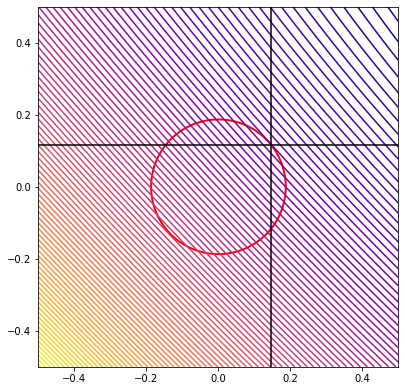

In [214]:
xx, yy = np.meshgrid(np.linspace(-0.5, 0.5, num=100), np.linspace(-0.5, 0.5, num=100))
zz = ((np.abs((xx))**2) + (np.abs((yy))**2))/0.035
ax = plt.figure(figsize=(5,5)).add_axes([0,0,1,1])
ax.contour(xx, yy, zz, [1], colors='red', linewidths=2)
ax.contour(w1_xx, w2_yy, E_zz, nums, cmap='plasma')
ax.axhline(y=0.115, color = 'k')
ax.axvline(x=0.145, color = 'k')

min_error = (1/len(Y_train))*np.sum((Y_train - 0.115*X_train[:,0] - 0.145*X_train[:,1])**2)
print(min_error)

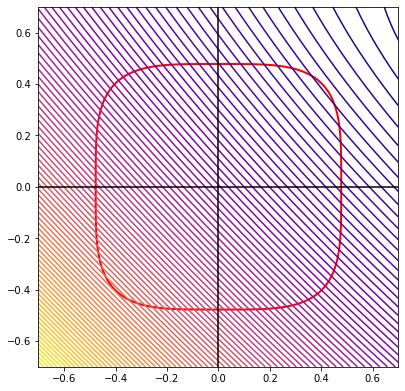

In [216]:
nums = 100
w1_xx, w2_yy = np.meshgrid(np.linspace(-0.7, 0.7, num=nums), np.linspace(-0.7, 0.7, num=nums))
E_zz = np.zeros((nums,nums))
for idx1 in range(nums):
  for idx2 in range(nums):
    E_zz[idx1][idx2] = (1/len(Y_train))*np.sum((Y_train - w1_xx[0][idx1]*X_train[:,0] - w2_yy[idx2][0]*X_train[:,1])**2)
    
xx, yy = np.meshgrid(np.linspace(-0.7, 0.7, num=100), np.linspace(-0.7, 0.7, num=100))
zz = ((np.abs((xx))**4) + (np.abs((yy))**4))/0.052
ax = plt.figure(figsize=(5,5)).add_axes([0,0,1,1])
ax.contour(xx, yy, zz, [1], colors='red', linewidths=2)
ax.contour(w1_xx, w2_yy, E_zz, nums, cmap='plasma')
ax.axhline(y=0, color = 'k')
ax.axvline(x=0, color = 'k')

5042.883143713728


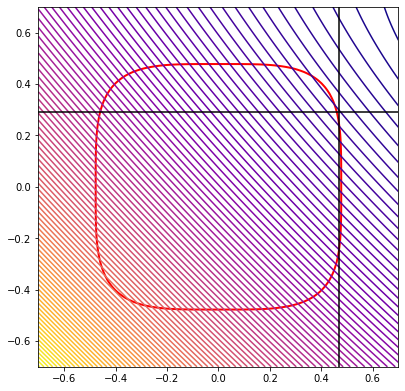

In [222]:
xx, yy = np.meshgrid(np.linspace(-0.7, 0.7, num=100), np.linspace(-0.7, 0.7, num=100))
zz = ((np.abs((xx))**4) + (np.abs((yy))**4))/0.052
ax = plt.figure(figsize=(5,5)).add_axes([0,0,1,1])
ax.contour(xx, yy, zz, [1], colors='red', linewidths=2)
ax.contour(w1_xx, w2_yy, E_zz, nums, cmap='plasma')
ax.axhline(y=0.29, color = 'k')
ax.axvline(x=0.47, color = 'k')

min_error = (1/len(Y_train))*np.sum((Y_train - 0.47*X_train[:,0] - 0.29*X_train[:,1])**2)
print(min_error)